<a href="https://colab.research.google.com/github/NayanaPradeep/Netflix-Movies-and-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



## **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **SOLUTION**

##**IMPORTING THE LIBRARIES**

In [1]:
#importing necessary libraries for the dataset analysis
import numpy as np                                            # Computation on datasets
import pandas as pd                                           # Data processing, analysing and wrangling
import matplotlib.pyplot as plt                               # Data visualization --plotting
import matplotlib.image as mpimg                              # Data visualization --images
%matplotlib inline                                            
import seaborn as sns                                         # Data visualization --plotting

import warnings
warnings.filterwarnings('ignore')

##**MOUNT THE DRIVE**

In [2]:
#Mount the drive to load the dataset 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**IMPORT THE DATASET**

In [3]:
# Read the dataset to start analyzing
file_path = '/content/drive/MyDrive/Colab Notebooks/Netflix Movies and TV Shows Clustering - Nayana Pradeep/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
netflix_df=pd.read_csv(file_path)

In [4]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
netflix_df.shape

(7787, 12)

In [ ]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
#Checking the number of duplicates in the dataset
len(netflix_df[netflix_df.duplicated( keep='first')])

0

In [18]:
#Find the number of columns with null value for each column
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [10]:
netflix_df.type.unique()

array(['TV Show', 'Movie'], dtype=object)

In [11]:
netflix_df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [12]:
netflix_df.duplicated().sum()

0

In [13]:
netflix_df_original_copy = netflix_df.copy()

In [14]:
# Replacing the values where the director is null with "Unknown"
netflix_df["director"] = netflix_df["director"].fillna("Director Info Missing")
netflix_df["cast"] = netflix_df["cast"].fillna("Cast Info Missing")
netflix_df["country"] = netflix_df["country"].fillna("Country Info Missing")

In [15]:
#Find the number of columns with null value for each column
netflix_df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [17]:
#Dropping the null value rows
netflix_df.dropna(axis=0,how='any',inplace = True)
netflix_df.shape

(7770, 12)

In [19]:
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])
netflix_df['day_added'] = netflix_df['date_added'].dt.day
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added']=netflix_df['date_added'].dt.month
netflix_df['year_added'].astype(int);
netflix_df['day_added'].astype(int);

Text(0.5, 1.0, 'Type')

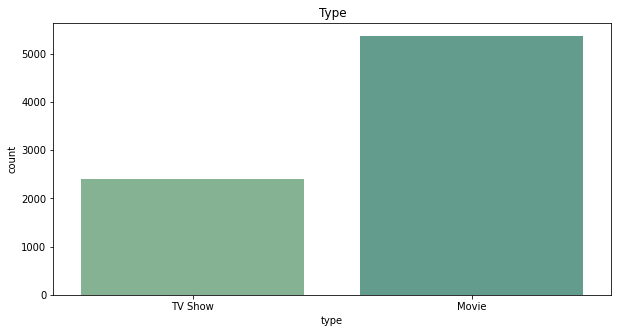

In [22]:
sns.set_palette("crest")
plt.figure(figsize=(10,5))
sns.countplot(netflix_df['type'])
plt.title('Type')

In [23]:
netflix_df["type"].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

Text(0.5, 1.0, 'RATING')

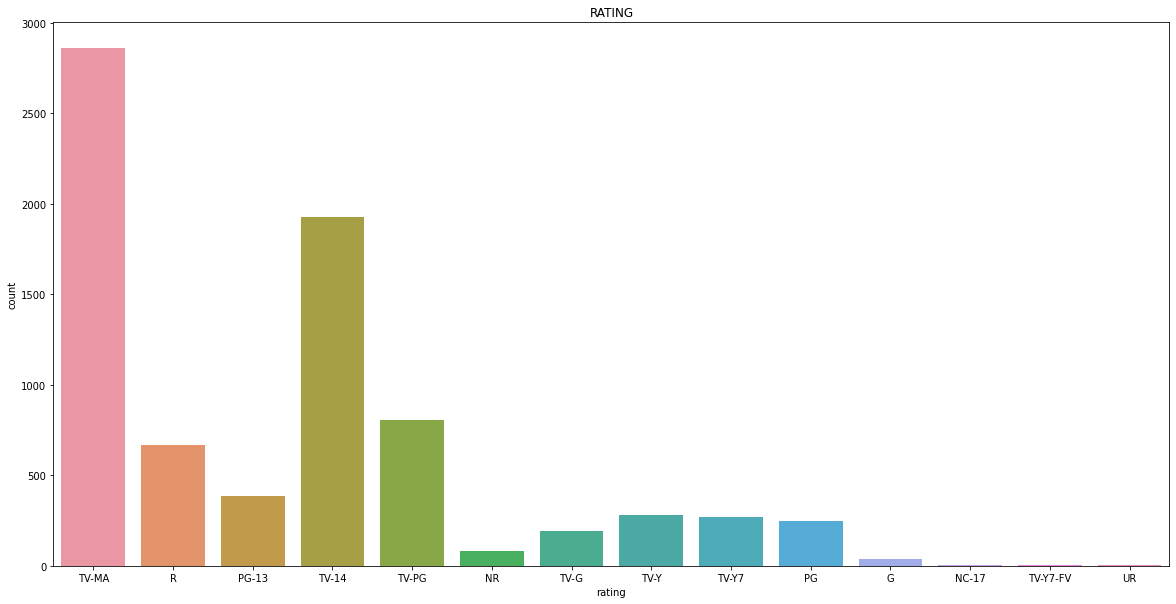

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(netflix_df['rating'])
plt.title('RATING')



*   TV-MA :- This program is intended to be viewed by mature, adult audiences and may be unsuitable for children under 17
*   R :- Restricted; Under 17 requires accompanying parent or adult guardian
*  PG-13 :- Parents strongly cautioned; Some material may be inappropriate for children 
*  TV-14 :- This program may be unsuitable for children under 14 years of age
*  TV-PG :- This program contains material that parents may find unsuitable for younger children; Parental guidance is recommended
*  NR :- If a film has not been submitted for a rating or is an uncut version of a film that was submitted, the labels Not Rated (NR) or Unrated (UR) are often used. 
*  TV-G :- This program is suitable for all ages
*   TV-Y :- This program is aimed at a very young audience, including children from ages 2–6
*   TV-Y7 :- This program is most appropriate for children age 7 and up.
*   PG :- Parental guidance suggested
*   G :- All ages admitted; General audiences.
*   NC-17 :- Adults Only; No One 17 and Under Admitted; Clearly adult; Children are not admitted
*   TV-Y7-FV :- Programming with fantasy violence that may be more intense or more combative than other programming in the TV-Y7 category
*  UR :- If a film has not been submitted for a rating or is an uncut version of a film that was submitted, the labels Not Rated (NR) or Unrated (UR) are often used. 


In [25]:
netflix_df["rating"].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

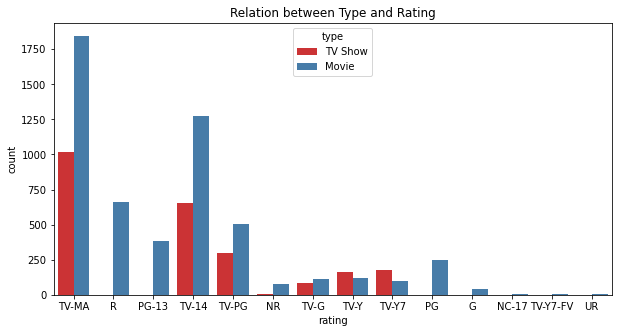

In [28]:
sns.set_palette("Set1")
plt.figure(figsize=(10,5))
sns.countplot(x='rating',hue='type',data=netflix_df)
plt.title('Relation between Type and Rating')
plt.show()

In [29]:
netflix_df["release_year"].value_counts()

2018    1120
2017    1010
2019     996
2016     881
2020     868
        ... 
1966       1
1947       1
1959       1
1964       1
1925       1
Name: release_year, Length: 73, dtype: int64